In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import time
from xgboost import XGBClassifier

In [3]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [ ]:
from google.colab import files
files.upload()

Loading and Understanding the Dataset

In [5]:
df_original = pd.read_csv("Drug_Consumption.csv")
df_quantified = pd.read_csv("Drug_Consumption_Quantified.csv")

print("Shape of original dataset: ", df_original.shape)
print("Shape of quantified dataset: ", df_quantified.shape)

Shape of original dataset:  (1884, 32)
Shape of quantified dataset:  (1884, 32)


In [6]:
df_original.head()

ID    Age Gender                          Education Country Ethnicity  \
0   2  25-34      M                   Doctorate degree      UK     White   
1   3  35-44      M  Professional certificate/ diploma      UK     White   
2   4  18-24      F                     Masters degree      UK     White   
3   5  35-44      F                   Doctorate degree      UK     White   
4   6    65+      F            Left school at 18 years  Canada     White   

    Nscore   Escore   Oscore   AScore  ...  Ecstasy  Heroin  Ketamine Legalh  \
0 -0.67825  1.93886  1.43533  0.76096  ...      CL4     CL0       CL2    CL0   
1 -0.46725  0.80523 -0.84732 -1.62090  ...      CL0     CL0       CL0    CL0   
2 -0.14882 -0.80615 -0.01928  0.59042  ...      CL0     CL0       CL2    CL0   
3  0.73545 -1.63340 -0.45174 -0.30172  ...      CL1     CL0       CL0    CL1   
4 -0.67825 -0.30033 -1.55521  2.03972  ...      CL0     CL0       CL0    CL0   

   LSD Meth Mushrooms Nicotine Semer  VSA  
0  CL2  CL3       CL0      CL4   CL0  CL0  
1  CL0  CL0       CL1      CL0   CL0  CL0  
2  CL0  CL0       CL0      CL2   CL0  CL0  
3  CL0  CL0       CL2      CL2   CL0  CL0  
4  CL0  CL0       CL0      CL6   CL0  CL0  

[5 rows x 32 columns]

In [7]:
df_quantified.head()

ID      Age   Gender  Education  Country  Ethnicity   Nscore   Escore  \
0   2 -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886   
1   3  0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523   
2   4 -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615   
3   5  0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340   
4   6  2.59171  0.48246   -1.22751  0.24923   -0.31685 -0.67825 -0.30033   

    Oscore   AScore  ...  Ecstasy  Heroin  Ketamine Legalh  LSD Meth  \
0  1.43533  0.76096  ...      CL4     CL0       CL2    CL0  CL2  CL3   
1 -0.84732 -1.62090  ...      CL0     CL0       CL0    CL0  CL0  CL0   
2 -0.01928  0.59042  ...      CL0     CL0       CL2    CL0  CL0  CL0   
3 -0.45174 -0.30172  ...      CL1     CL0       CL0    CL1  CL0  CL0   
4 -1.55521  2.03972  ...      CL0     CL0       CL0    CL0  CL0  CL0   

  Mushrooms Nicotine Semer  VSA  
0       CL0      CL4   CL0  CL0  
1       CL1      CL0   CL0  CL0  
2       CL0      CL2   CL0  CL0  
3       CL2      CL2   CL0  CL0  
4       CL0      CL6   CL0  CL0  

[5 rows x 32 columns]

We will be working with the Quantified Dataset. Dropping the ID feature since there should not be a correlation between the prediction and ID.

In [ ]:
df = df_quantified.drop('ID', axis = 1)
print("df.shape: ", df.shape)
df.head()

df.shape:  (1884, 31)


Age   Gender  Education  Country  Ethnicity   Nscore   Escore   Oscore  \
0 -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886  1.43533   
1  0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523 -0.84732   
2 -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615 -0.01928   
3  0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340 -0.45174   
4  2.59171  0.48246   -1.22751  0.24923   -0.31685 -0.67825 -0.30033 -1.55521   

    AScore   Cscore  ...  Ecstasy  Heroin Ketamine Legalh  LSD Meth Mushrooms  \
0  0.76096 -0.14277  ...      CL4     CL0      CL2    CL0  CL2  CL3       CL0   
1 -1.62090 -1.01450  ...      CL0     CL0      CL0    CL0  CL0  CL0       CL1   
2  0.59042  0.58489  ...      CL0     CL0      CL2    CL0  CL0  CL0       CL0   
3 -0.30172  1.30612  ...      CL1     CL0      CL0    CL1  CL0  CL0       CL2   
4  2.03972  1.63088  ...      CL0     CL0      CL0    CL0  CL0  CL0       CL0   

  Nicotine Semer  VSA  
0      CL4   CL0  CL0  
1      CL0   CL0  CL0  
2      CL2   CL0  CL0  
3      CL2   CL0  CL0  
4      CL6   CL0  CL0  

[5 rows x 31 columns]

Pre-Processing 1 : Check for missing values


In [ ]:
print(df.isnull().mean() * 100)

print("Number of rows with missing values: ", df.isnull().any(axis=1).sum())
print("Number of columns with missing values: ", df.isnull().any(axis=0).sum())

Age          0.0
Gender       0.0
Education    0.0
Country      0.0
Ethnicity    0.0
Nscore       0.0
Escore       0.0
Oscore       0.0
AScore       0.0
Cscore       0.0
Impulsive    0.0
SS           0.0
Alcohol      0.0
Amphet       0.0
Amyl         0.0
Benzos       0.0
Caff         0.0
Cannabis     0.0
Choc         0.0
Coke         0.0
Crack        0.0
Ecstasy      0.0
Heroin       0.0
Ketamine     0.0
Legalh       0.0
LSD          0.0
Meth         0.0
Mushrooms    0.0
Nicotine     0.0
Semer        0.0
VSA          0.0
dtype: float64
Number of rows with missing values:  0
Number of columns with missing values:  0


We observe that there are no missing values in the dataset

Pre-Processing 2 : Visualzing the correlation matrix

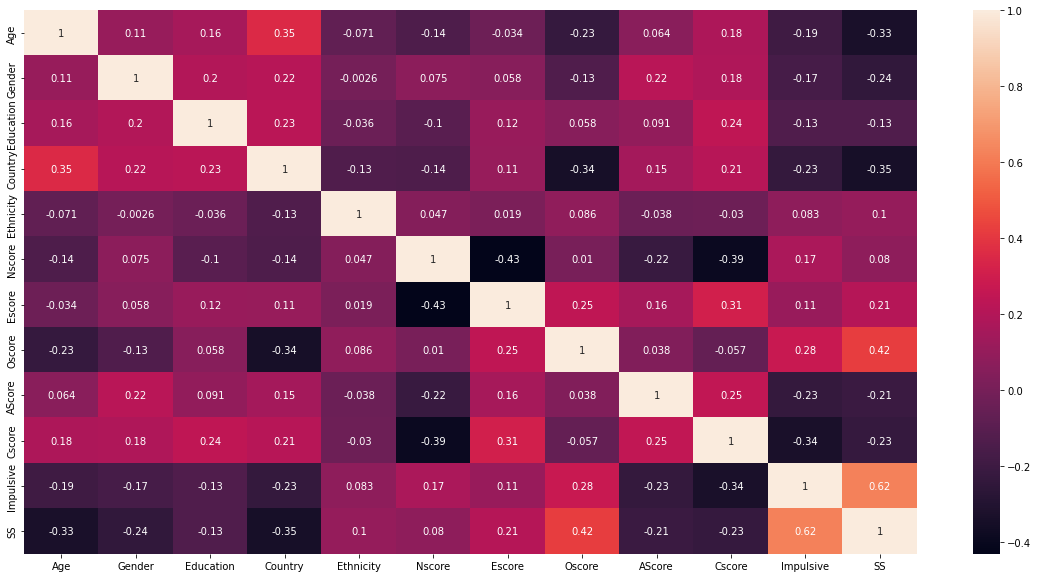

In [ ]:
corr = df.corr()
plt.figure(figsize = (20, 10))
sns.heatmap(corr, annot = True)

We observe that none of the features are highly correlated with one another (no pair of features has correlation more than 0.90)

Pre-Processing 3 : Subset Datasets by Target
  * This a multi-class classification with 18 targets and 7 classes
  * We subset the dataset into 12 different subsets each having one target
  * For each subset, we do a multi-class classification over the 7 classes
  * 12 targets refer to 12 out of the 18 drugs we choose to model
      * df_alcohol
      * df_caff
      * df_cannabis
      * df_choc
      * df_coke
      * df_crack
      * df_ecstasy
      * df_heroin
      * df_lsd
      * df_mushrooms
      * df_nicotine
      * df_semer
  * 7 classes refer to the following labels
      * "Never Used" ; Embedded as CLO in the dataset
      * "Used over a Decade" ; Embedded as CL1 in the dataset
      * "Used in Last Decade" ; Embedded as CL2 in the dataset
      * "Used in Last Year" ; Embedded as CL3 in the dataset
      * "Used in Lasr Month" ; Embedded as CL4 in the dataset
      * "Used in Last Week" ; Embedded as CL5 in the dataset
      * "Used in Last Day" ; Embedded as CL6 in the dataset


In [ ]:
print("Following features are present in the dataset")

for col in df.columns:
  print(col)

Following features are present in the dataset
Age
Gender
Education
Country
Ethnicity
Nscore
Escore
Oscore
AScore
Cscore
Impulsive
SS
Alcohol
Amphet
Amyl
Benzos
Caff
Cannabis
Choc
Coke
Crack
Ecstasy
Heroin
Ketamine
Legalh
LSD
Meth
Mushrooms
Nicotine
Semer
VSA


In [ ]:
drugs_to_ignore = ['Amphet', 'Amyl', 'Benzos', 'Ketamine', 'Legalh', 'Meth', 'VSA']
drugs_to_consider = ['Alcohol', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'LSD', 'Mushrooms', 'Nicotine', 'Semer']

Pre-Processing 3.1 : Creating subsets to perform prediction over only "drugs_to_consider" attributes

In [ ]:
non_alcohol_feature = drugs_to_ignore + ['Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'LSD', 'Mushrooms', 'Nicotine', 'Semer']
non_caff_features = drugs_to_ignore + ['Alcohol', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'LSD', 'Mushrooms', 'Nicotine', 'Semer']
non_cannabis_features = drugs_to_ignore + ['Alcohol', 'Caff', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'LSD', 'Mushrooms', 'Nicotine', 'Semer']
non_choc_features = drugs_to_ignore + ['Alcohol', 'Caff', 'Cannabis', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'LSD', 'Mushrooms', 'Nicotine', 'Semer']
non_coke_features = drugs_to_ignore + ['Alcohol', 'Caff', 'Cannabis', 'Choc', 'Crack', 'Ecstasy', 'Heroin', 'LSD', 'Mushrooms', 'Nicotine', 'Semer']
non_crack_features = drugs_to_ignore + ['Alcohol', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Ecstasy', 'Heroin', 'LSD', 'Mushrooms', 'Nicotine', 'Semer']
non_ecstasy_features = drugs_to_ignore + ['Alcohol', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Heroin', 'LSD', 'Mushrooms', 'Nicotine', 'Semer']
non_heroin_features = drugs_to_ignore + ['Alcohol', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'LSD', 'Mushrooms', 'Nicotine', 'Semer']
non_lsd_features = drugs_to_ignore + ['Alcohol', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Mushrooms', 'Nicotine', 'Semer']
non_mushrooms_features = drugs_to_ignore + ['Alcohol', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'LSD', 'Nicotine', 'Semer']
non_nicotine_features = drugs_to_ignore + ['Alcohol', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'LSD', 'Mushrooms', 'Semer']
non_semer_features = drugs_to_ignore + ['Alcohol', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'LSD', 'Mushrooms', 'Nicotine']

In [ ]:
df_alcohol = df.drop(non_alcohol_feature, axis = 1)

df_caff = df.drop(non_caff_features, axis = 1)

df_cannabis = df.drop(non_cannabis_features, axis = 1)

df_choc = df.drop(non_choc_features, axis = 1)

df_coke = df.drop(non_coke_features, axis = 1)

df_crack = df.drop(non_crack_features, axis = 1)

df_ecstasy = df.drop(non_ecstasy_features, axis = 1)

df_heroin = df.drop(non_heroin_features, axis = 1)

df_lsd = df.drop(non_lsd_features, axis = 1)

df_mushrooms = df.drop(non_mushrooms_features, axis = 1)

df_nicotine = df.drop(non_nicotine_features, axis = 1)

df_semer = df.drop(non_semer_features, axis = 1)

In [ ]:
df_alcohol.head()

Age   Gender  Education  Country  Ethnicity   Nscore   Escore   Oscore  \
0 -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886  1.43533   
1  0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523 -0.84732   
2 -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615 -0.01928   
3  0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340 -0.45174   
4  2.59171  0.48246   -1.22751  0.24923   -0.31685 -0.67825 -0.30033 -1.55521   

    AScore   Cscore  Impulsive       SS Alcohol  
0  0.76096 -0.14277   -0.71126 -0.21575     CL5  
1 -1.62090 -1.01450   -1.37983  0.40148     CL6  
2  0.59042  0.58489   -1.37983 -1.18084     CL4  
3 -0.30172  1.30612   -0.21712 -0.21575     CL4  
4  2.03972  1.63088   -1.37983 -1.54858     CL2

In [ ]:
df_caff.head()

Age   Gender  Education  Country  Ethnicity   Nscore   Escore   Oscore  \
0 -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886  1.43533   
1  0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523 -0.84732   
2 -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615 -0.01928   
3  0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340 -0.45174   
4  2.59171  0.48246   -1.22751  0.24923   -0.31685 -0.67825 -0.30033 -1.55521   

    AScore   Cscore  Impulsive       SS Caff  
0  0.76096 -0.14277   -0.71126 -0.21575  CL6  
1 -1.62090 -1.01450   -1.37983  0.40148  CL6  
2  0.59042  0.58489   -1.37983 -1.18084  CL5  
3 -0.30172  1.30612   -0.21712 -0.21575  CL6  
4  2.03972  1.63088   -1.37983 -1.54858  CL6

In [ ]:
df_cannabis.head()

Age   Gender  Education  Country  Ethnicity   Nscore   Escore   Oscore  \
0 -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886  1.43533   
1  0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523 -0.84732   
2 -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615 -0.01928   
3  0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340 -0.45174   
4  2.59171  0.48246   -1.22751  0.24923   -0.31685 -0.67825 -0.30033 -1.55521   

    AScore   Cscore  Impulsive       SS Cannabis  
0  0.76096 -0.14277   -0.71126 -0.21575      CL4  
1 -1.62090 -1.01450   -1.37983  0.40148      CL3  
2  0.59042  0.58489   -1.37983 -1.18084      CL2  
3 -0.30172  1.30612   -0.21712 -0.21575      CL3  
4  2.03972  1.63088   -1.37983 -1.54858      CL0

In [ ]:
df_choc.head()

Age   Gender  Education  Country  Ethnicity   Nscore   Escore   Oscore  \
0 -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886  1.43533   
1  0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523 -0.84732   
2 -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615 -0.01928   
3  0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340 -0.45174   
4  2.59171  0.48246   -1.22751  0.24923   -0.31685 -0.67825 -0.30033 -1.55521   

    AScore   Cscore  Impulsive       SS Choc  
0  0.76096 -0.14277   -0.71126 -0.21575  CL6  
1 -1.62090 -1.01450   -1.37983  0.40148  CL4  
2  0.59042  0.58489   -1.37983 -1.18084  CL4  
3 -0.30172  1.30612   -0.21712 -0.21575  CL6  
4  2.03972  1.63088   -1.37983 -1.54858  CL4

In [ ]:
df_coke.head()

Age   Gender  Education  Country  Ethnicity   Nscore   Escore   Oscore  \
0 -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886  1.43533   
1  0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523 -0.84732   
2 -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615 -0.01928   
3  0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340 -0.45174   
4  2.59171  0.48246   -1.22751  0.24923   -0.31685 -0.67825 -0.30033 -1.55521   

    AScore   Cscore  Impulsive       SS Coke  
0  0.76096 -0.14277   -0.71126 -0.21575  CL3  
1 -1.62090 -1.01450   -1.37983  0.40148  CL0  
2  0.59042  0.58489   -1.37983 -1.18084  CL2  
3 -0.30172  1.30612   -0.21712 -0.21575  CL0  
4  2.03972  1.63088   -1.37983 -1.54858  CL0

In [ ]:
df_crack.head()

Age   Gender  Education  Country  Ethnicity   Nscore   Escore   Oscore  \
0 -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886  1.43533   
1  0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523 -0.84732   
2 -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615 -0.01928   
3  0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340 -0.45174   
4  2.59171  0.48246   -1.22751  0.24923   -0.31685 -0.67825 -0.30033 -1.55521   

    AScore   Cscore  Impulsive       SS Crack  
0  0.76096 -0.14277   -0.71126 -0.21575   CL0  
1 -1.62090 -1.01450   -1.37983  0.40148   CL0  
2  0.59042  0.58489   -1.37983 -1.18084   CL0  
3 -0.30172  1.30612   -0.21712 -0.21575   CL0  
4  2.03972  1.63088   -1.37983 -1.54858   CL0

In [ ]:
df_ecstasy.head()

Age   Gender  Education  Country  Ethnicity   Nscore   Escore   Oscore  \
0 -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886  1.43533   
1  0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523 -0.84732   
2 -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615 -0.01928   
3  0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340 -0.45174   
4  2.59171  0.48246   -1.22751  0.24923   -0.31685 -0.67825 -0.30033 -1.55521   

    AScore   Cscore  Impulsive       SS Ecstasy  
0  0.76096 -0.14277   -0.71126 -0.21575     CL4  
1 -1.62090 -1.01450   -1.37983  0.40148     CL0  
2  0.59042  0.58489   -1.37983 -1.18084     CL0  
3 -0.30172  1.30612   -0.21712 -0.21575     CL1  
4  2.03972  1.63088   -1.37983 -1.54858     CL0

In [ ]:
df_heroin.head()

Age   Gender  Education  Country  Ethnicity   Nscore   Escore   Oscore  \
0 -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886  1.43533   
1  0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523 -0.84732   
2 -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615 -0.01928   
3  0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340 -0.45174   
4  2.59171  0.48246   -1.22751  0.24923   -0.31685 -0.67825 -0.30033 -1.55521   

    AScore   Cscore  Impulsive       SS Heroin  
0  0.76096 -0.14277   -0.71126 -0.21575    CL0  
1 -1.62090 -1.01450   -1.37983  0.40148    CL0  
2  0.59042  0.58489   -1.37983 -1.18084    CL0  
3 -0.30172  1.30612   -0.21712 -0.21575    CL0  
4  2.03972  1.63088   -1.37983 -1.54858    CL0

In [ ]:
df_lsd.head()

Age   Gender  Education  Country  Ethnicity   Nscore   Escore   Oscore  \
0 -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886  1.43533   
1  0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523 -0.84732   
2 -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615 -0.01928   
3  0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340 -0.45174   
4  2.59171  0.48246   -1.22751  0.24923   -0.31685 -0.67825 -0.30033 -1.55521   

    AScore   Cscore  Impulsive       SS  LSD  
0  0.76096 -0.14277   -0.71126 -0.21575  CL2  
1 -1.62090 -1.01450   -1.37983  0.40148  CL0  
2  0.59042  0.58489   -1.37983 -1.18084  CL0  
3 -0.30172  1.30612   -0.21712 -0.21575  CL0  
4  2.03972  1.63088   -1.37983 -1.54858  CL0

In [ ]:
df_mushrooms.head()

Age   Gender  Education  Country  Ethnicity   Nscore   Escore   Oscore  \
0 -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886  1.43533   
1  0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523 -0.84732   
2 -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615 -0.01928   
3  0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340 -0.45174   
4  2.59171  0.48246   -1.22751  0.24923   -0.31685 -0.67825 -0.30033 -1.55521   

    AScore   Cscore  Impulsive       SS Mushrooms  
0  0.76096 -0.14277   -0.71126 -0.21575       CL0  
1 -1.62090 -1.01450   -1.37983  0.40148       CL1  
2  0.59042  0.58489   -1.37983 -1.18084       CL0  
3 -0.30172  1.30612   -0.21712 -0.21575       CL2  
4  2.03972  1.63088   -1.37983 -1.54858       CL0

In [ ]:
df_nicotine.head()

Age   Gender  Education  Country  Ethnicity   Nscore   Escore   Oscore  \
0 -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886  1.43533   
1  0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523 -0.84732   
2 -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615 -0.01928   
3  0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340 -0.45174   
4  2.59171  0.48246   -1.22751  0.24923   -0.31685 -0.67825 -0.30033 -1.55521   

    AScore   Cscore  Impulsive       SS Nicotine  
0  0.76096 -0.14277   -0.71126 -0.21575      CL4  
1 -1.62090 -1.01450   -1.37983  0.40148      CL0  
2  0.59042  0.58489   -1.37983 -1.18084      CL2  
3 -0.30172  1.30612   -0.21712 -0.21575      CL2  
4  2.03972  1.63088   -1.37983 -1.54858      CL6

In [ ]:
df_semer.head()

Age   Gender  Education  Country  Ethnicity   Nscore   Escore   Oscore  \
0 -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886  1.43533   
1  0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523 -0.84732   
2 -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615 -0.01928   
3  0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340 -0.45174   
4  2.59171  0.48246   -1.22751  0.24923   -0.31685 -0.67825 -0.30033 -1.55521   

    AScore   Cscore  Impulsive       SS Semer  
0  0.76096 -0.14277   -0.71126 -0.21575   CL0  
1 -1.62090 -1.01450   -1.37983  0.40148   CL0  
2  0.59042  0.58489   -1.37983 -1.18084   CL0  
3 -0.30172  1.30612   -0.21712 -0.21575   CL0  
4  2.03972  1.63088   -1.37983 -1.54858   CL0

In [9]:
df = df_original.drop(['ID'],axis=1)
df = df[df['Semer']=='CL0']
df = df.drop(['Semer'],axis=1)

In [10]:
drugs_to_consider = ['Alcohol', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'LSD', 'Mushrooms', 'Nicotine']

In [12]:
numeric_features = df._get_numeric_data().columns
categorical_features = df.columns[:5]

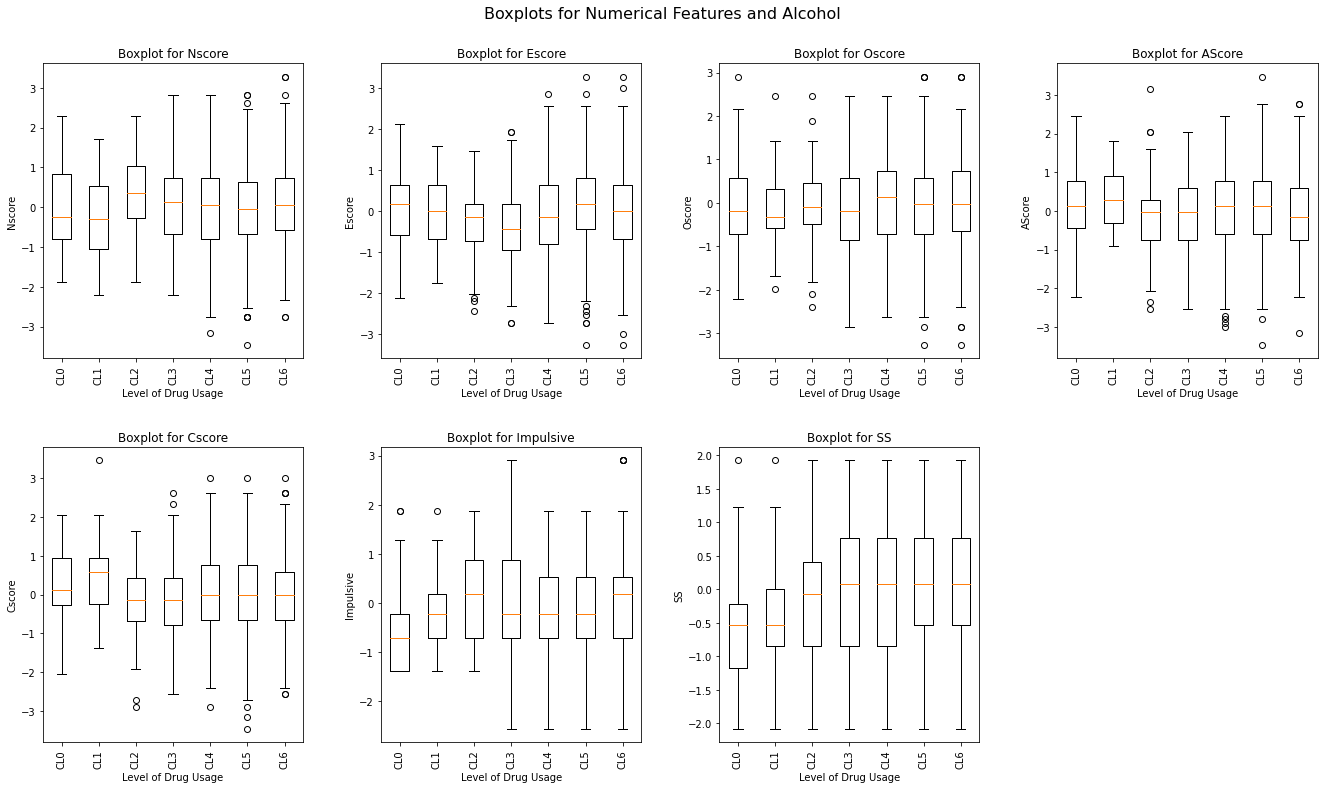

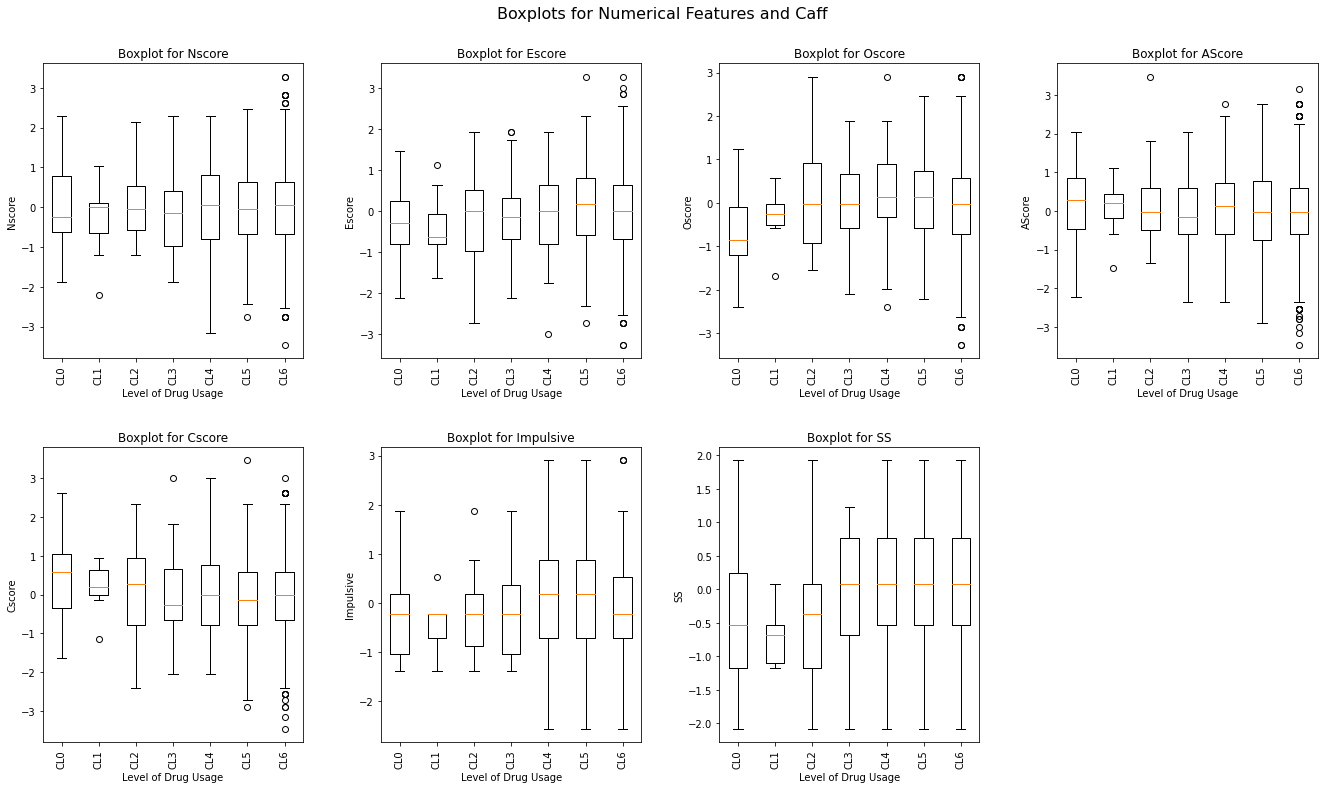

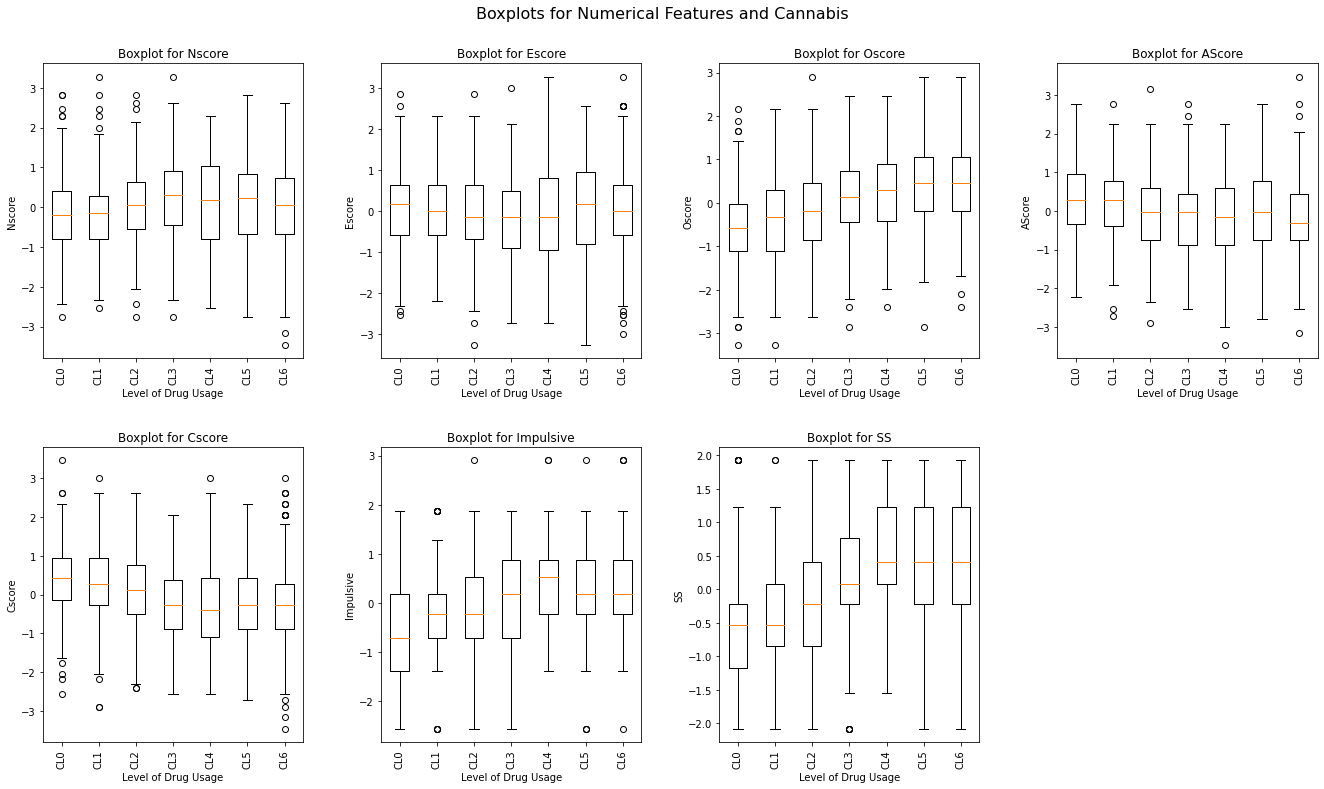

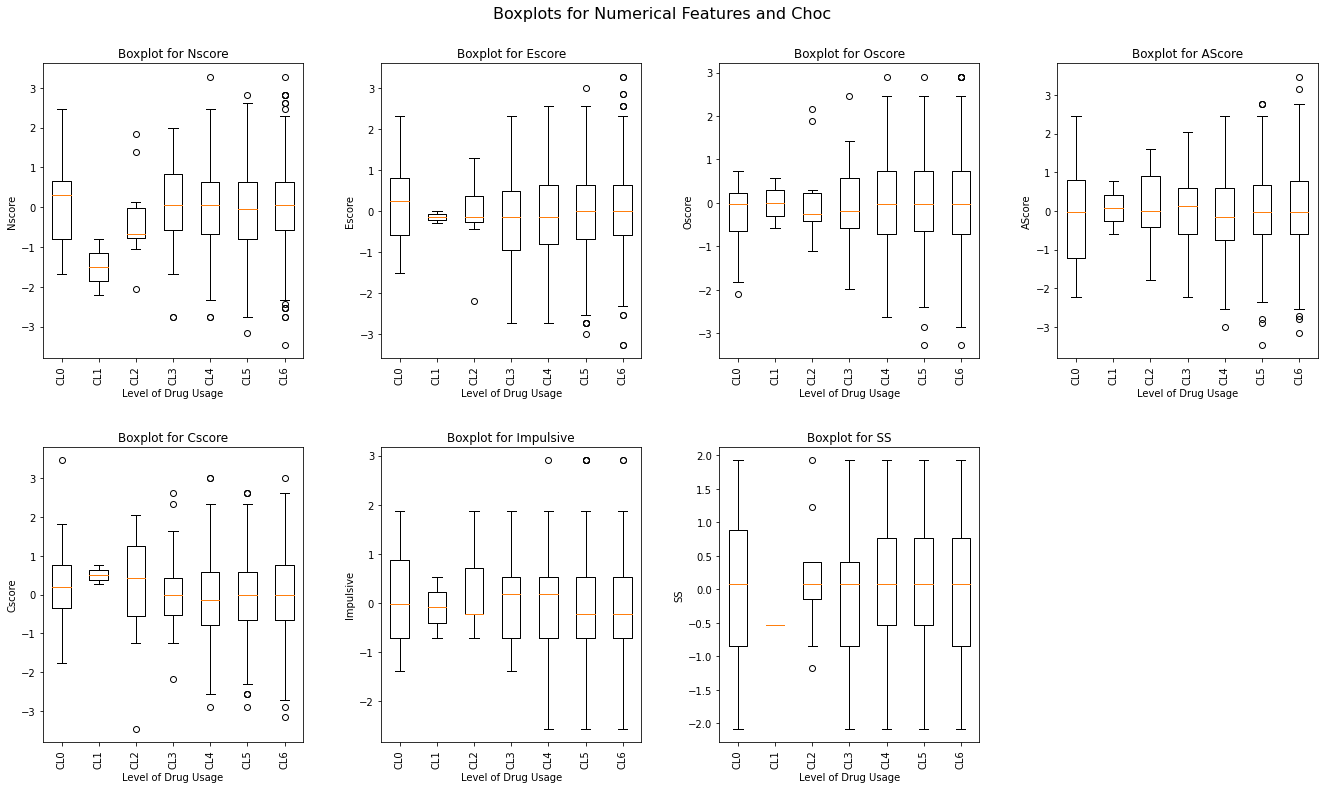

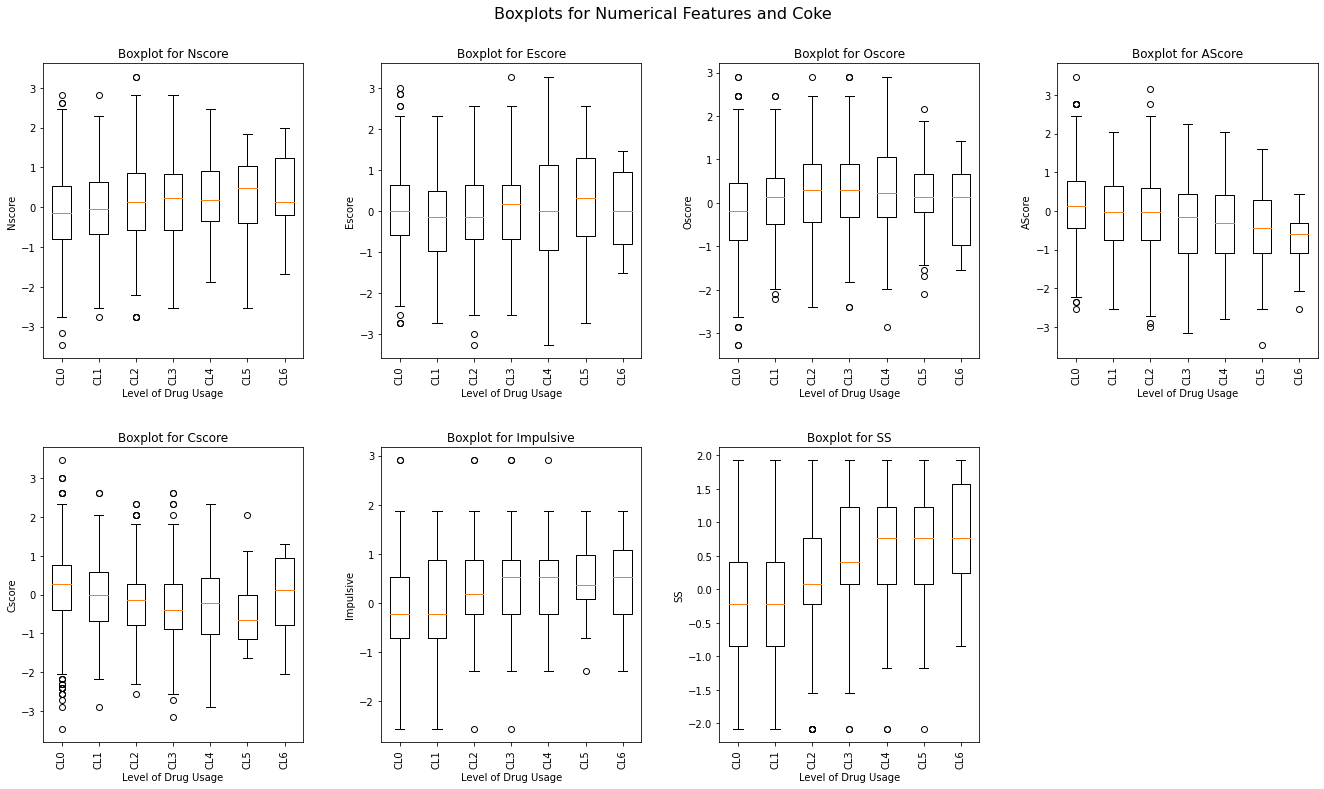

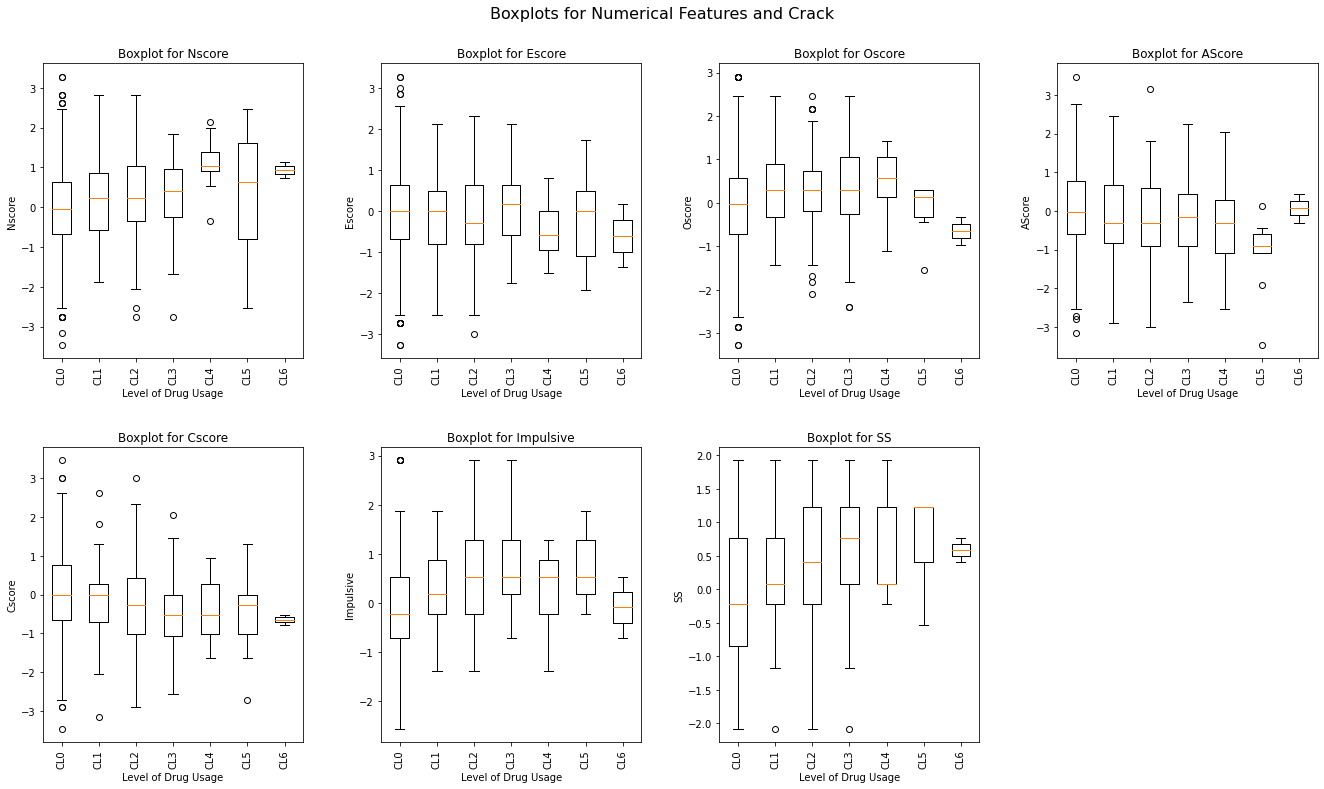

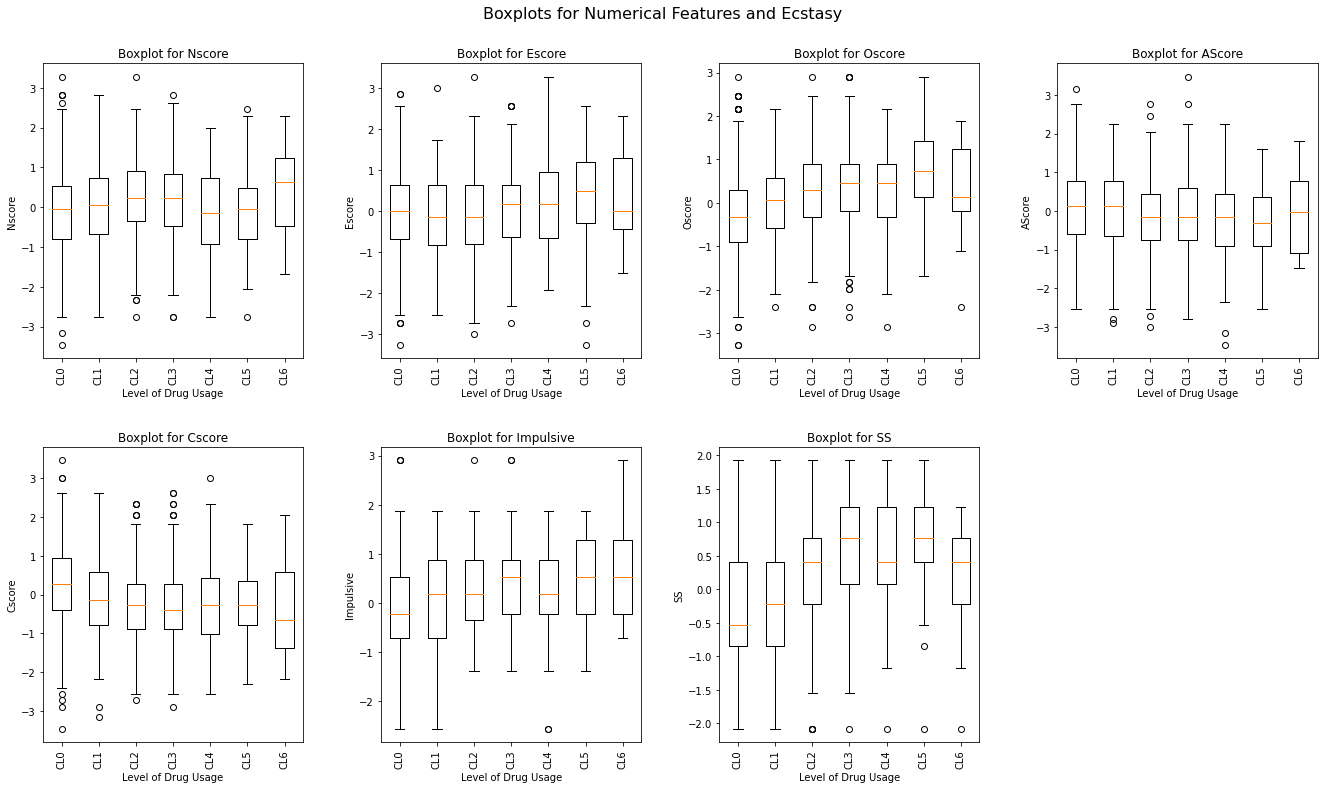

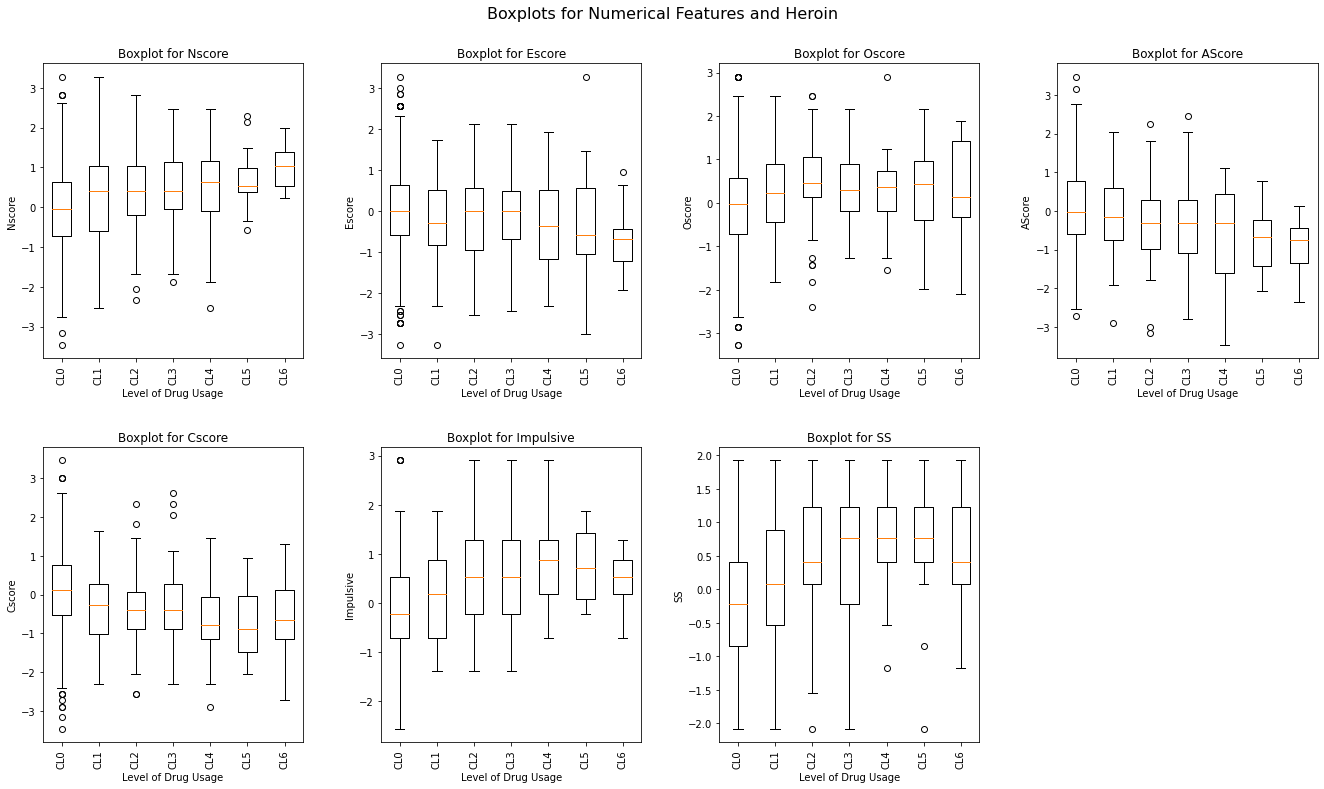

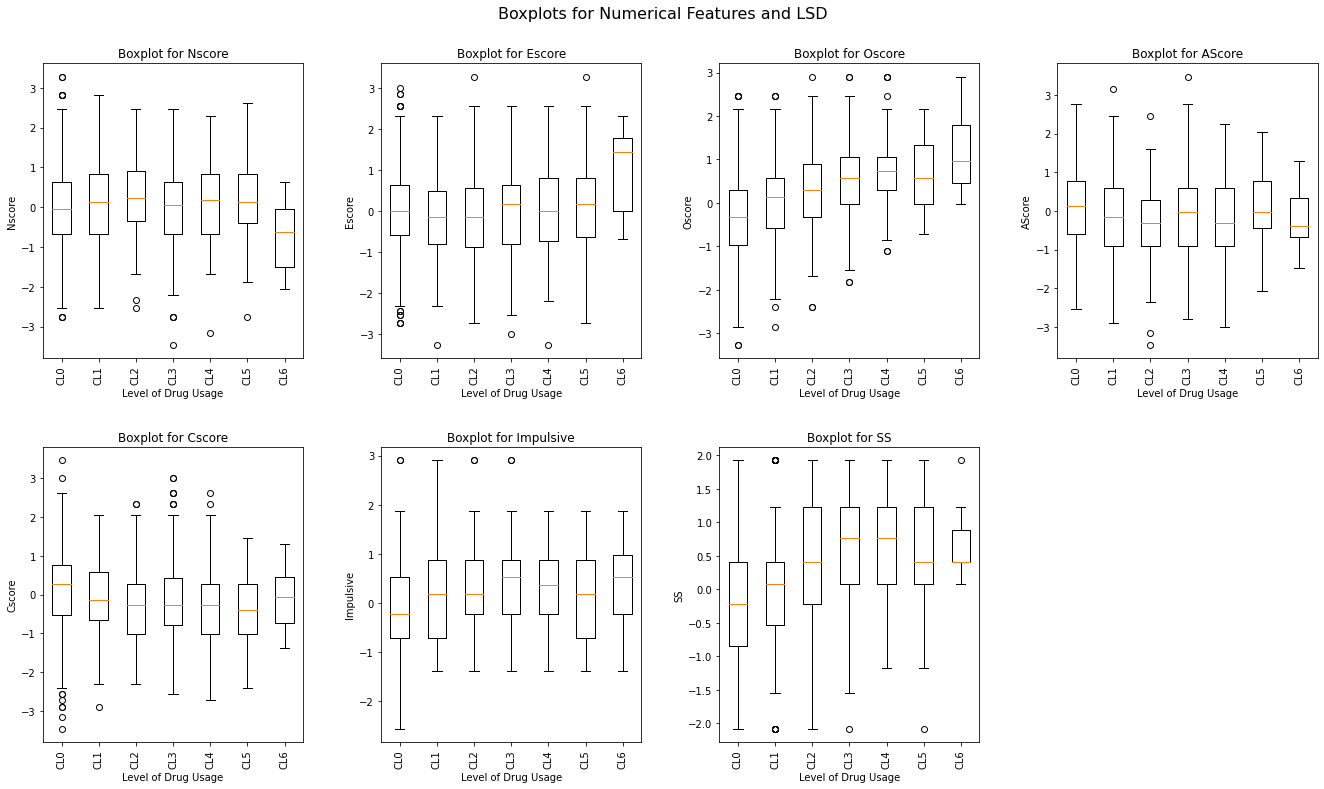

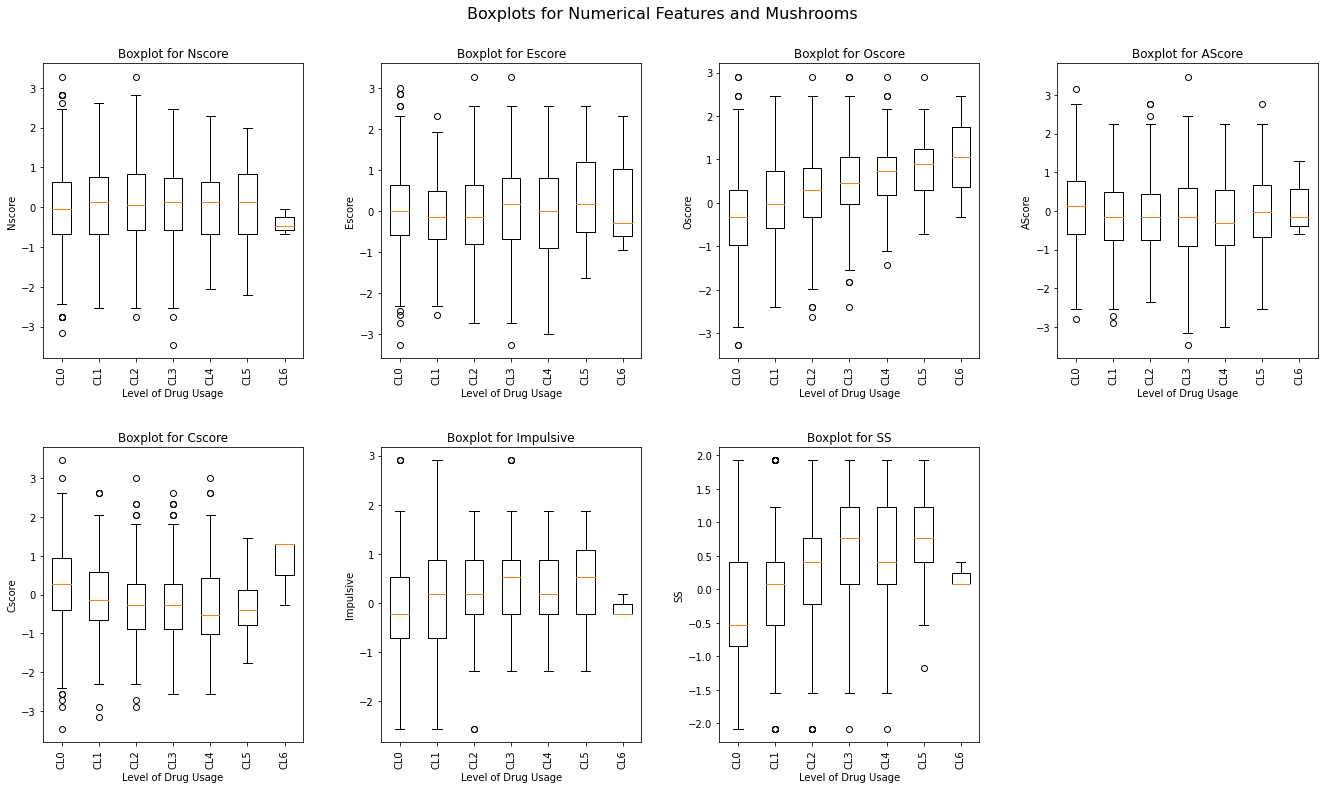

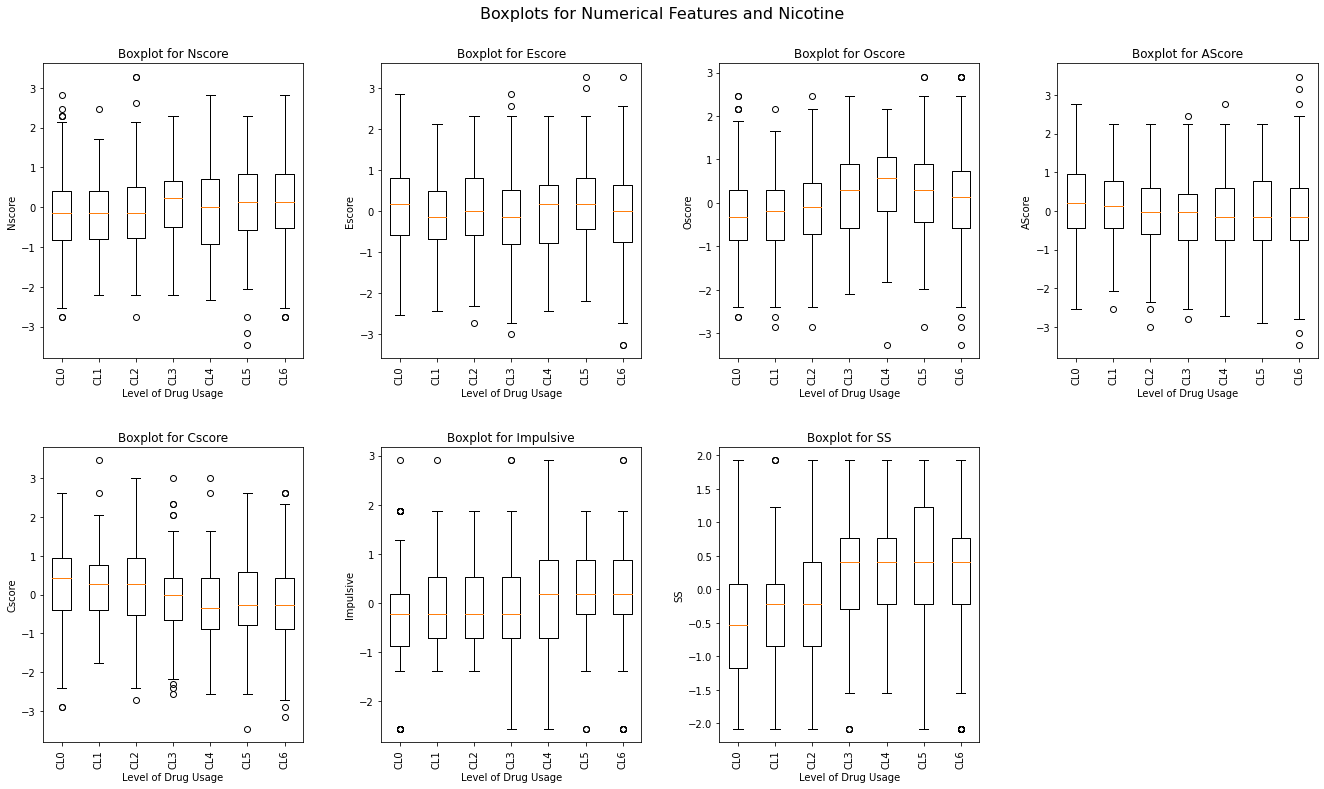

In [13]:
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)
for drug in drugs_to_consider:
  columns = []
  for numeric_feature in numeric_features:
    cl0 = df.loc[df[drug]=='CL0', numeric_feature]
    cl1 = df.loc[df[drug]=='CL1', numeric_feature]
    cl2 = df.loc[df[drug]=='CL2', numeric_feature]
    cl3 = df.loc[df[drug]=='CL3', numeric_feature]
    cl4 = df.loc[df[drug]=='CL4', numeric_feature]
    cl5 = df.loc[df[drug]=='CL5', numeric_feature]
    cl6 = df.loc[df[drug]=='CL6', numeric_feature]
    column = [cl0, cl1, cl2, cl3, cl4, cl5, cl6]
    columns.append(column)
  fig, ax = plt.subplots(2,4)
  for i in range(len(columns)):
    ax[i//4,i%4].boxplot(columns[i])
    ax[i//4,i%4].set_xticks([1,2,3,4,5,6,7])
    ax[i//4,i%4].set_xticklabels(['CL0','CL1','CL2','CL3','CL4','CL5','CL6'], rotation=90)
    ax[i//4,i%4].set_xlabel('Level of Drug Usage')
    ax[i//4,i%4].set_ylabel(numeric_features[i])
    ax[i//4,i%4].set_title('Boxplot for ' + numeric_features[i])
  fig.delaxes(ax[1,3])
  fig.set_size_inches(18.5, 10.5)
  fig.suptitle("Boxplots for Numerical Features and " + drug, fontsize=16, y=1.04)
  plt.tight_layout()
  plt.subplots_adjust(hspace=0.3, wspace=0.3)
  plt.show()

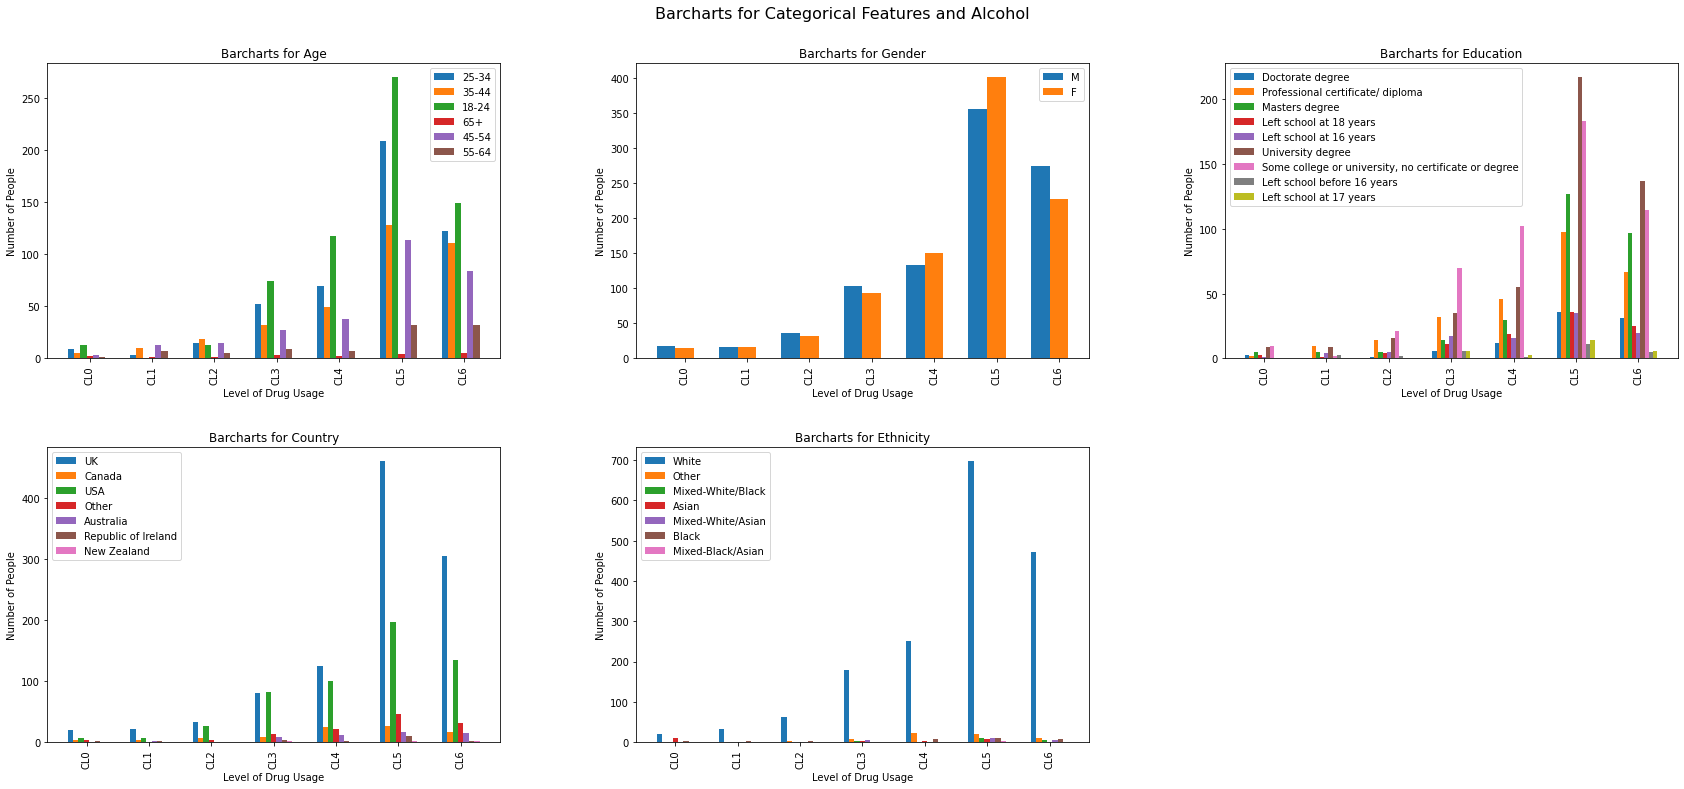

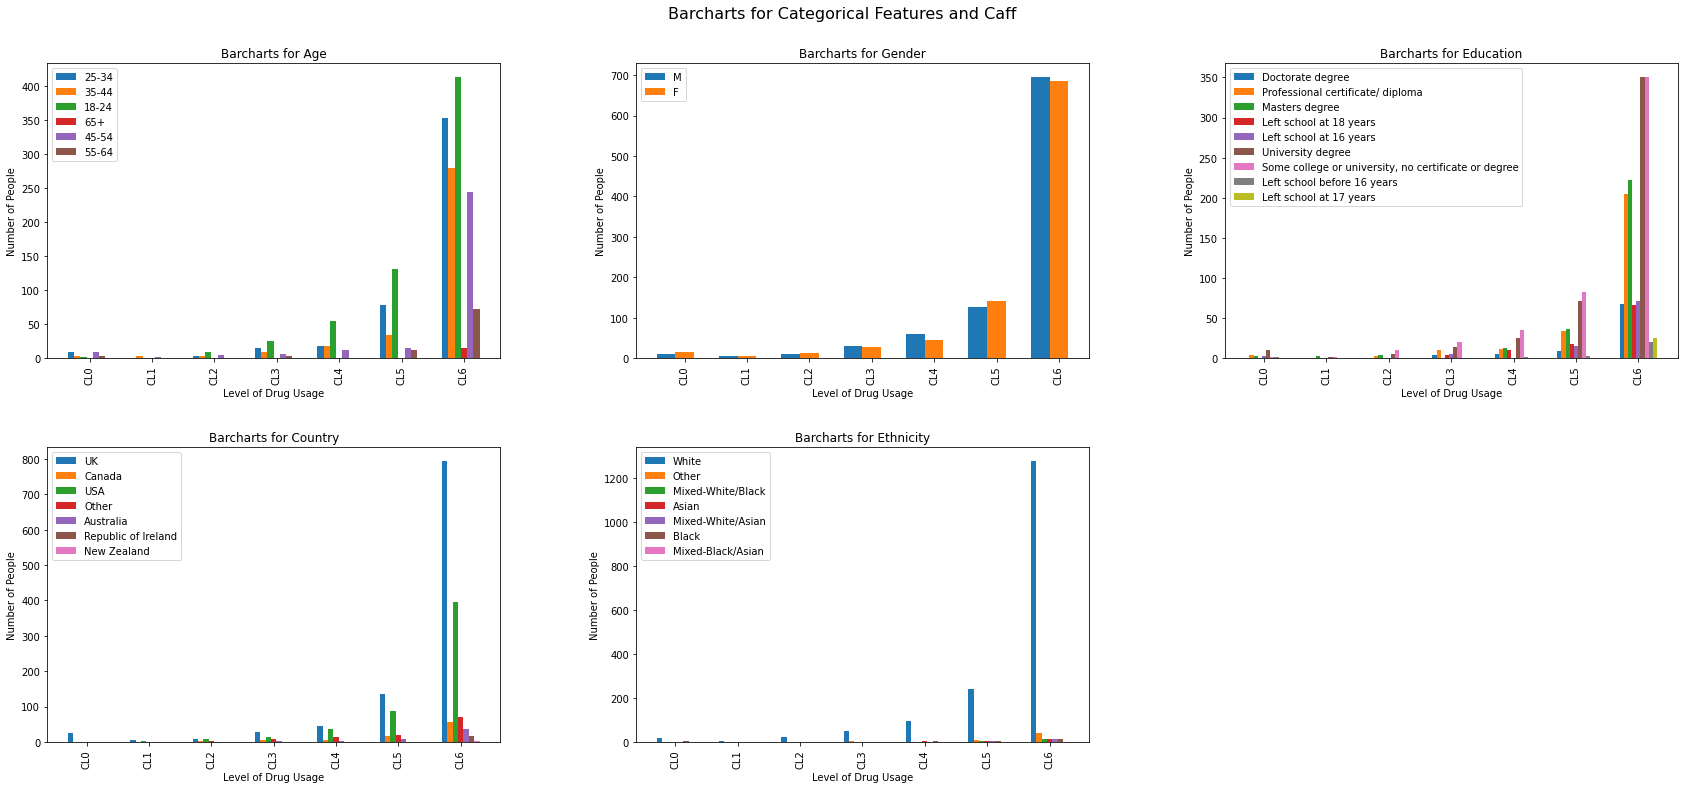

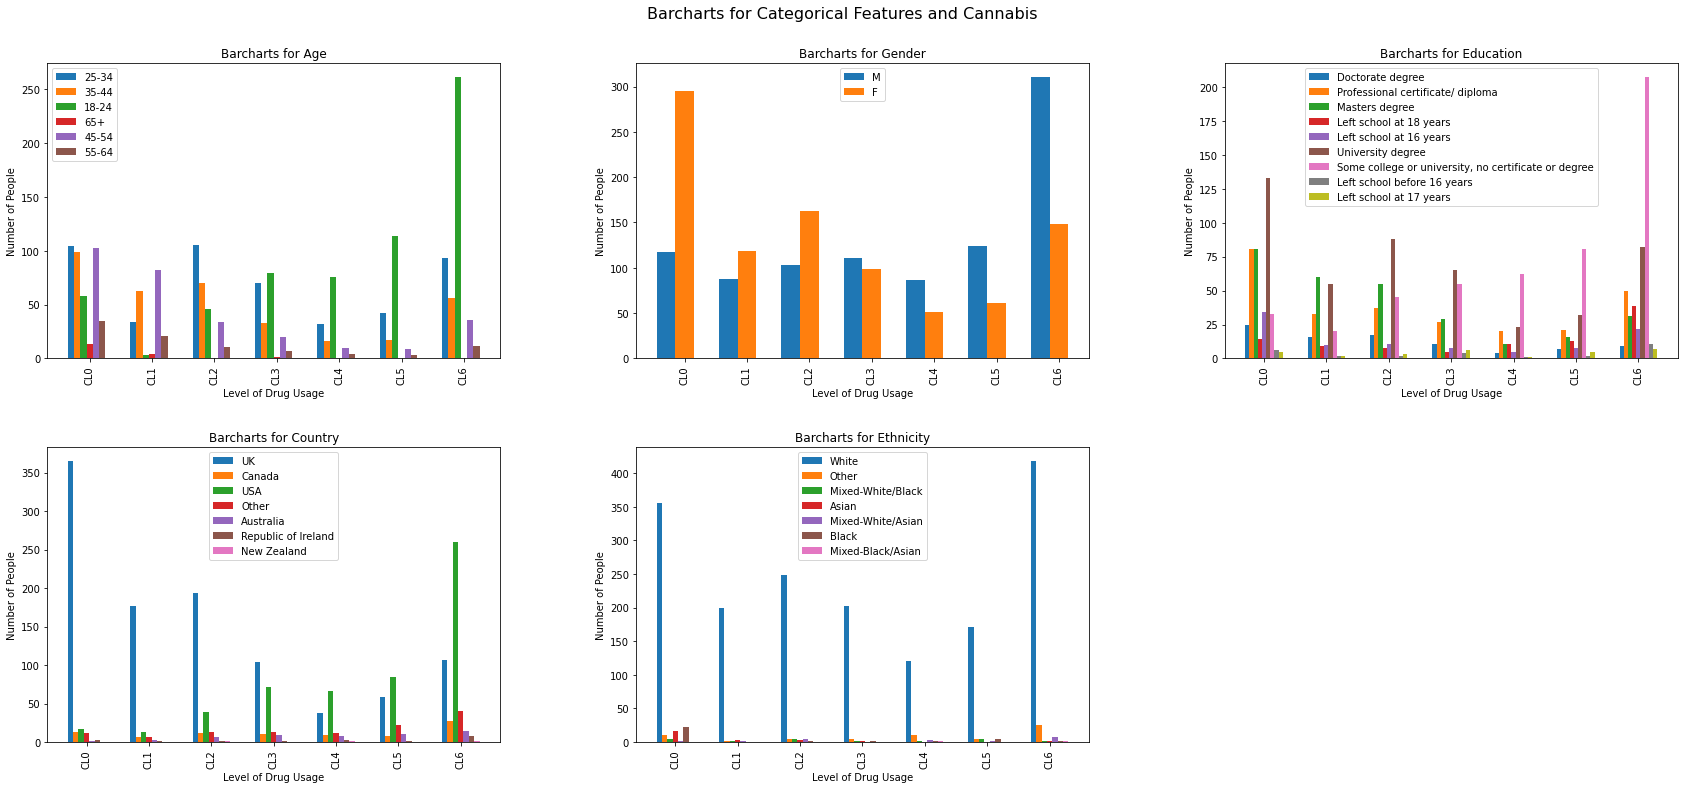

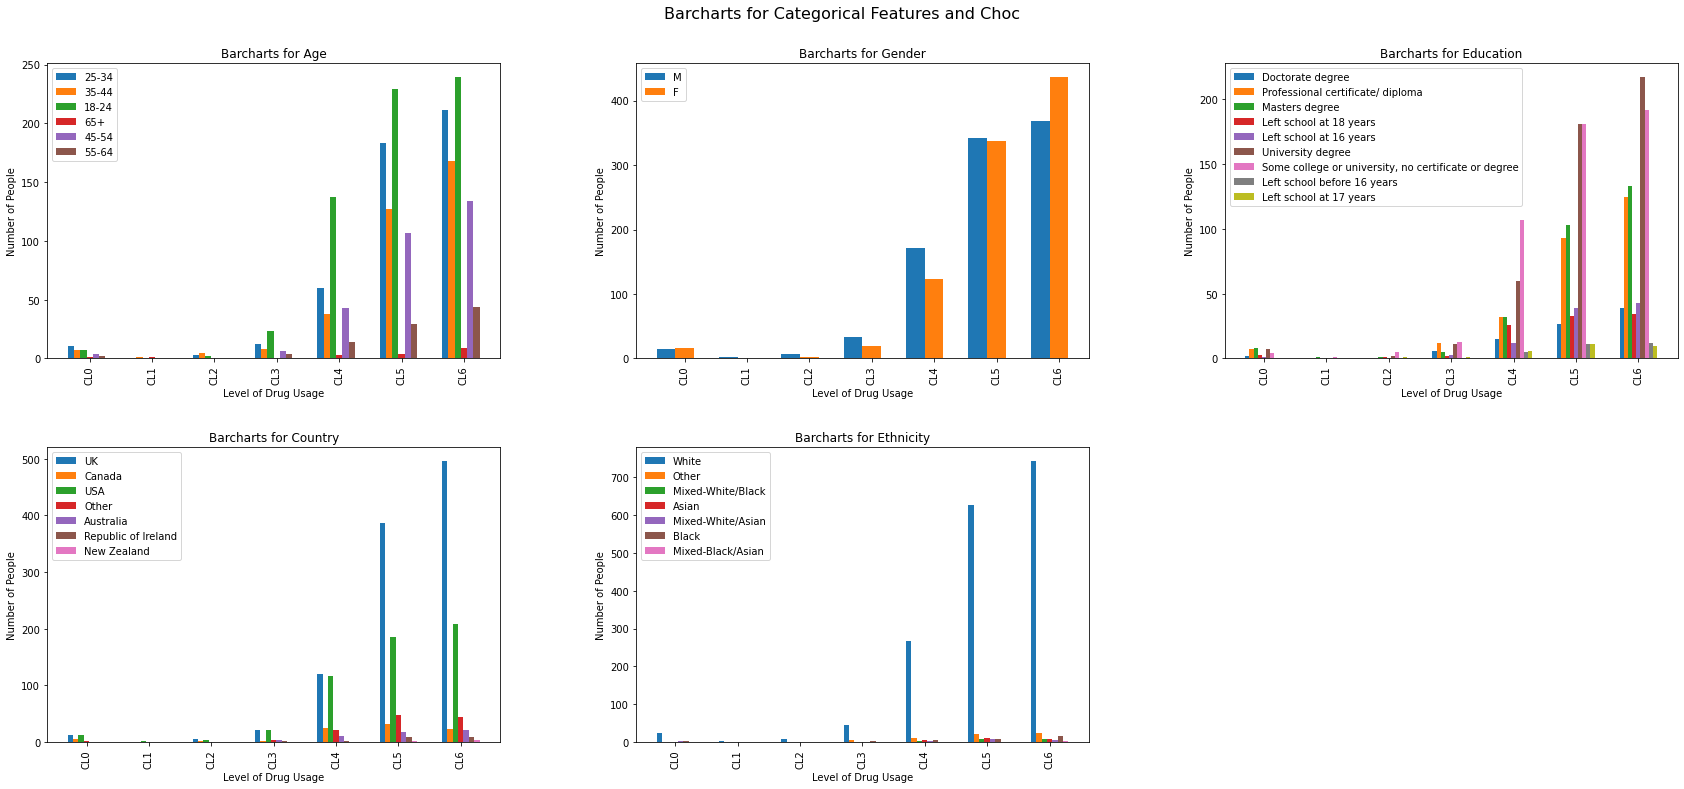

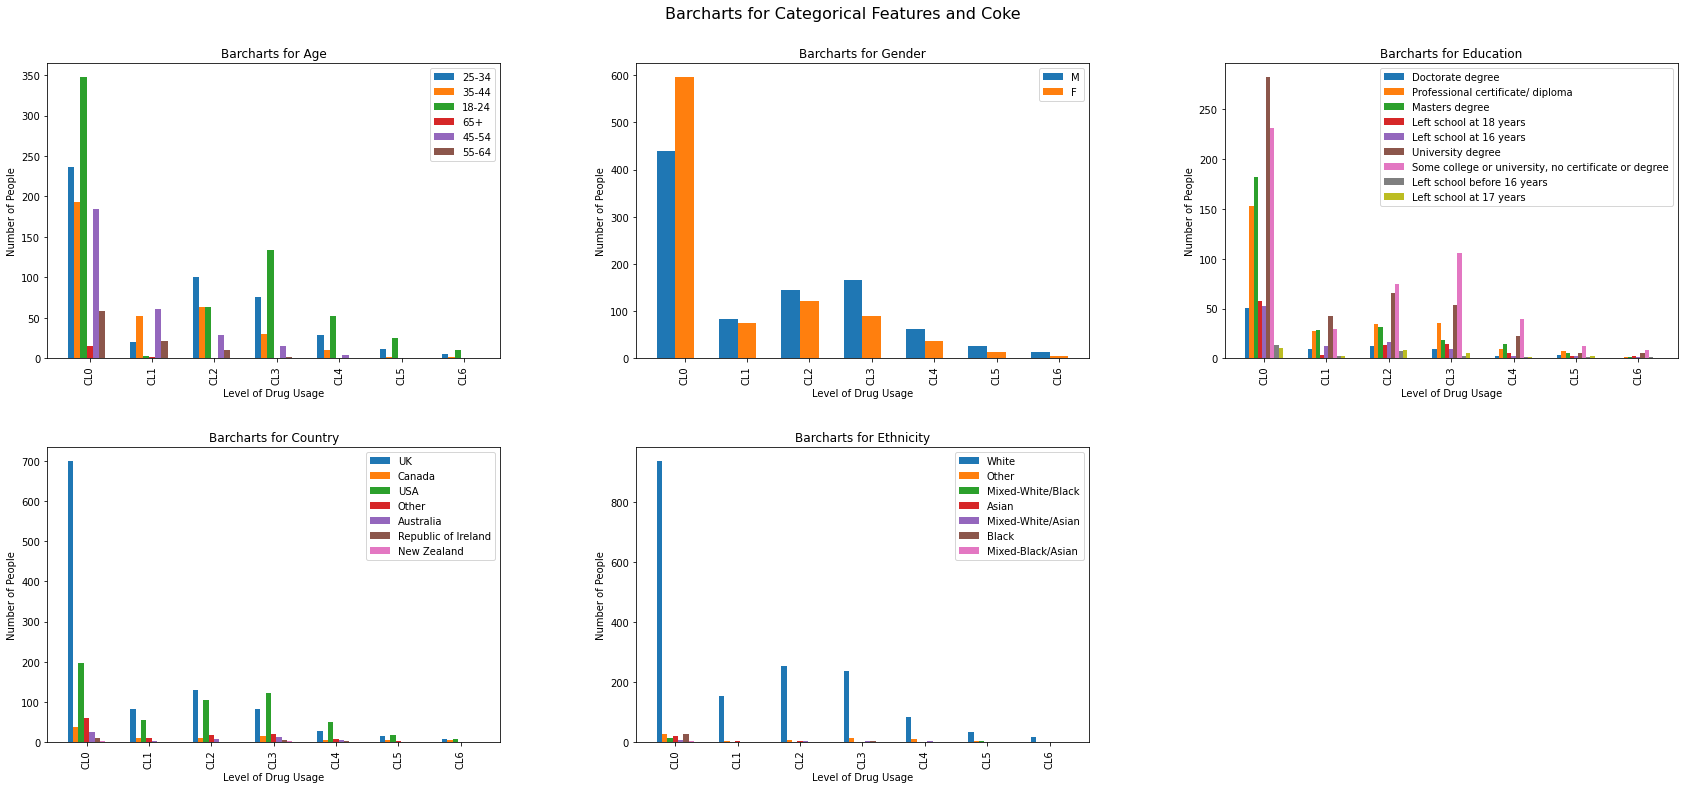

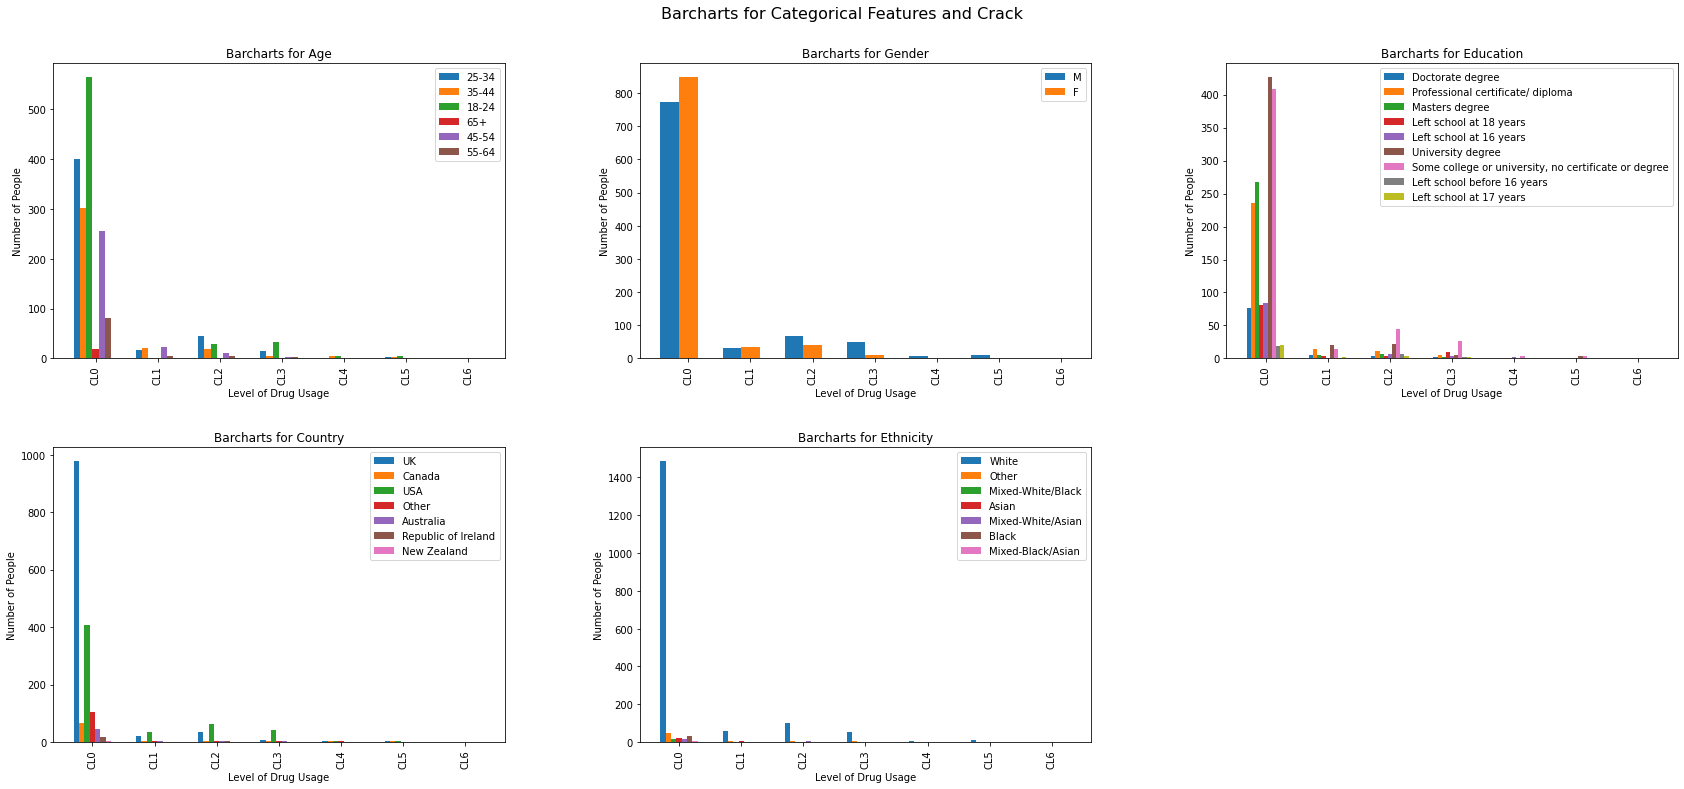

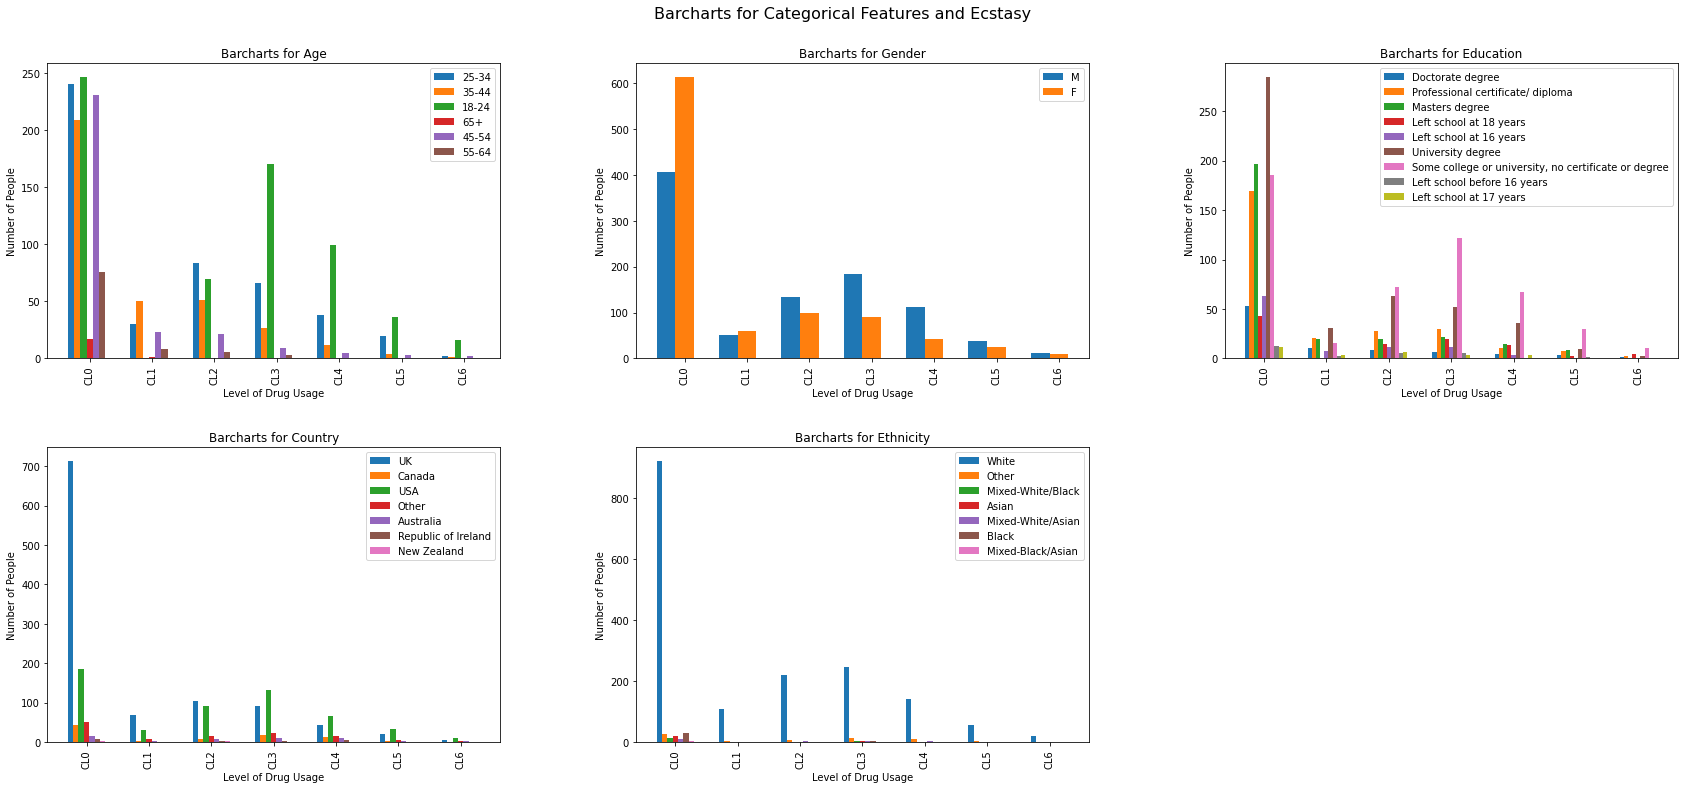

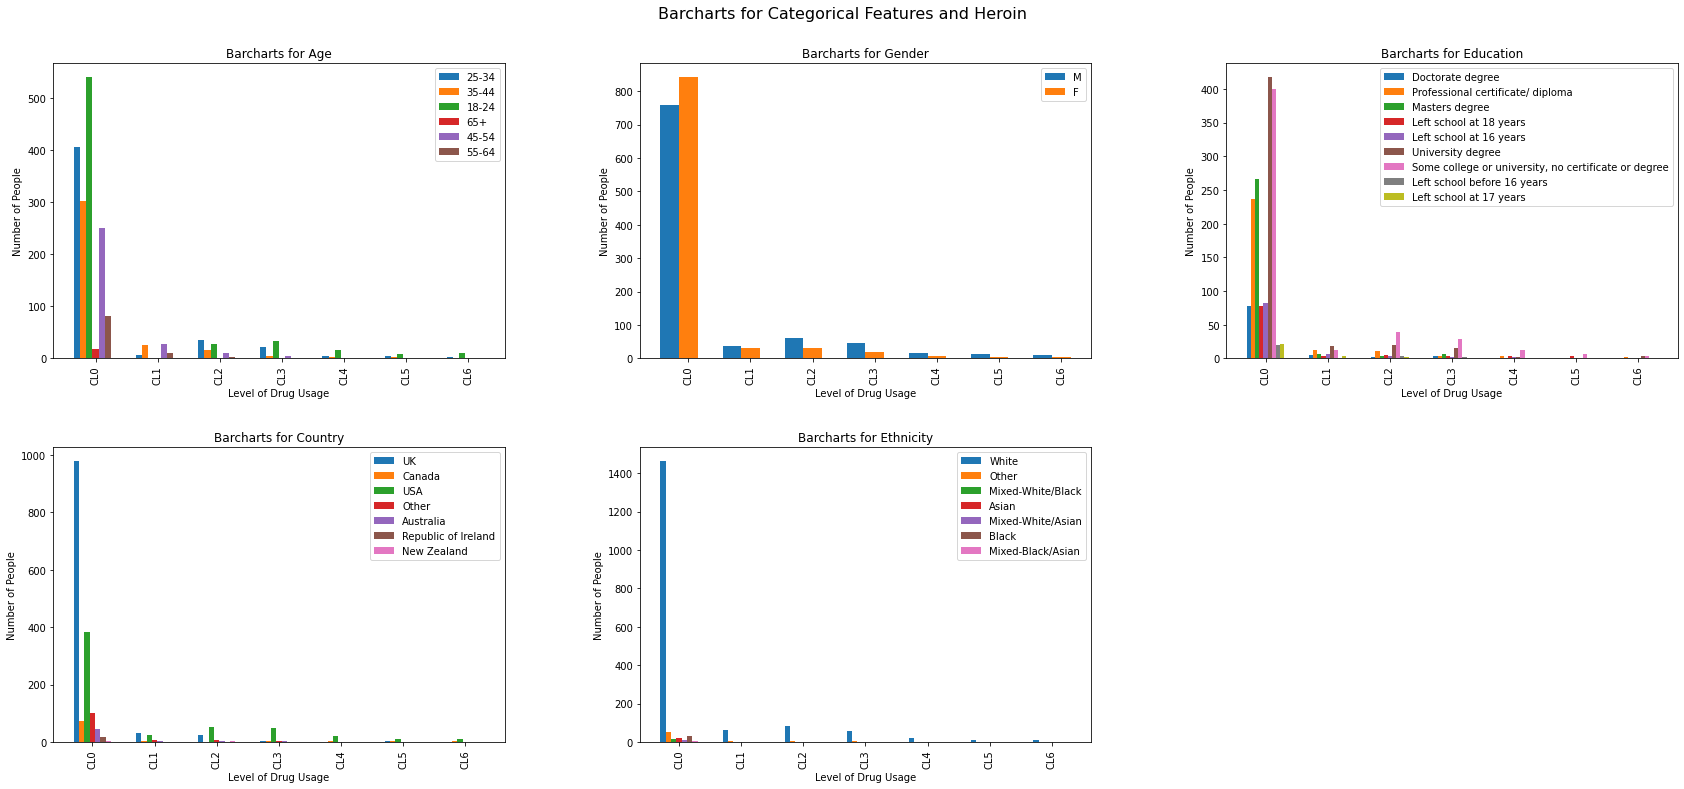

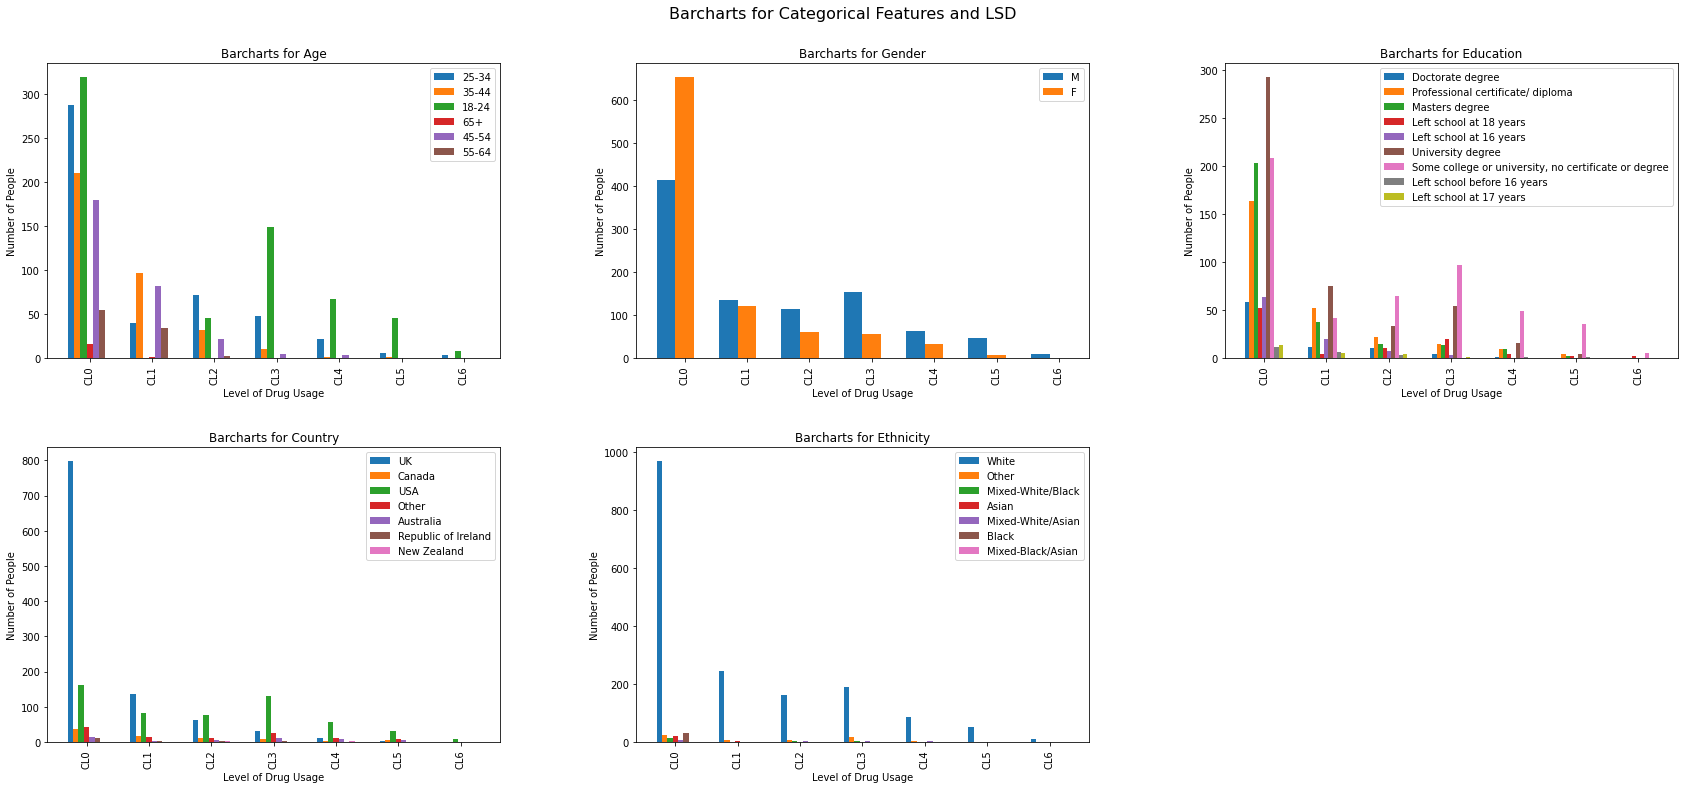

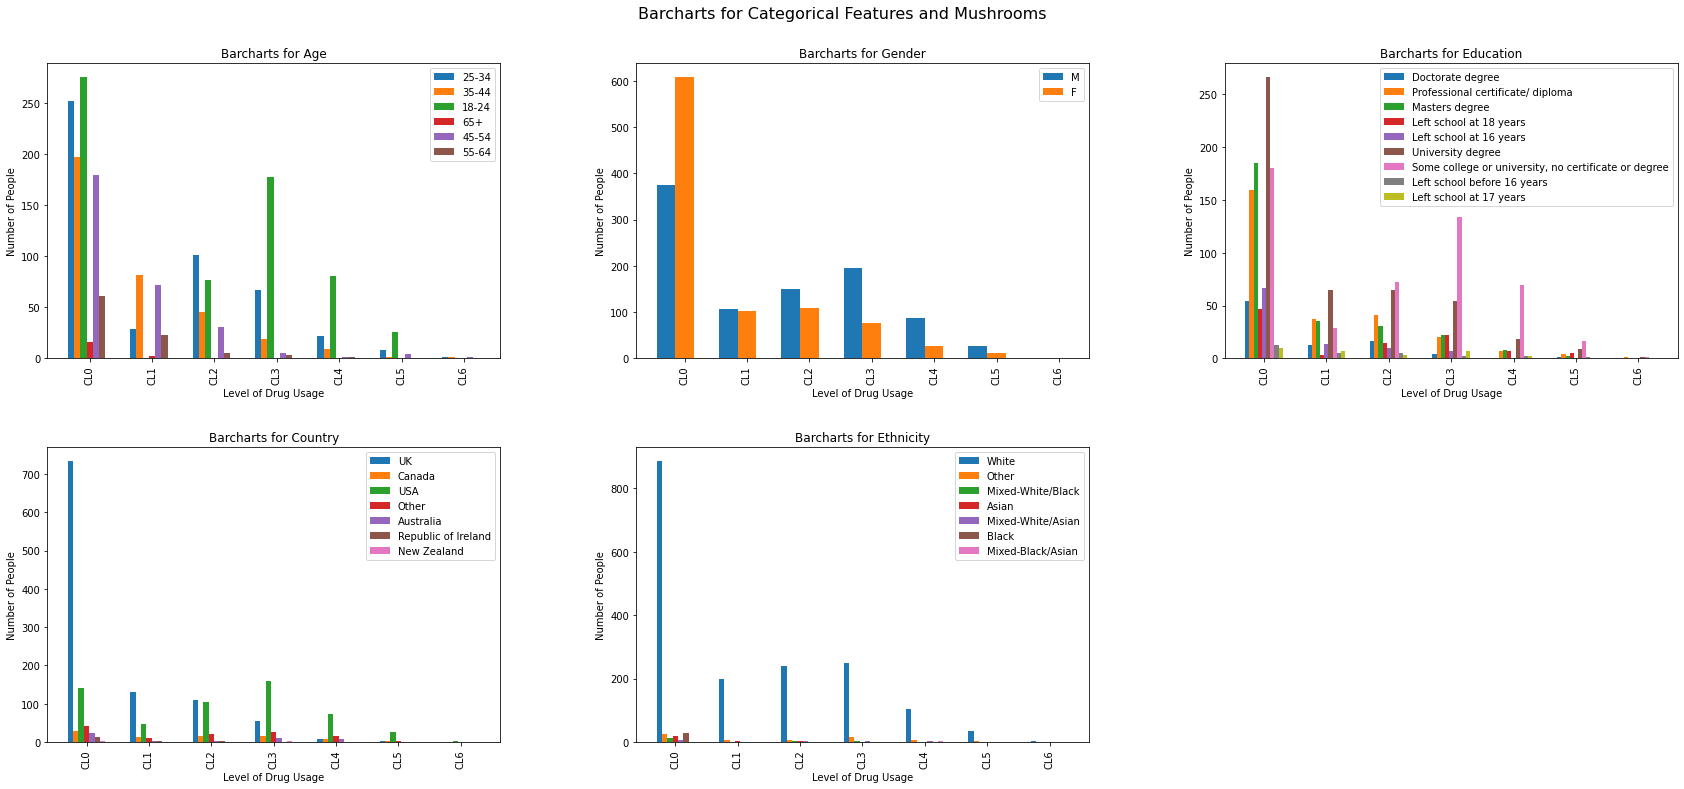

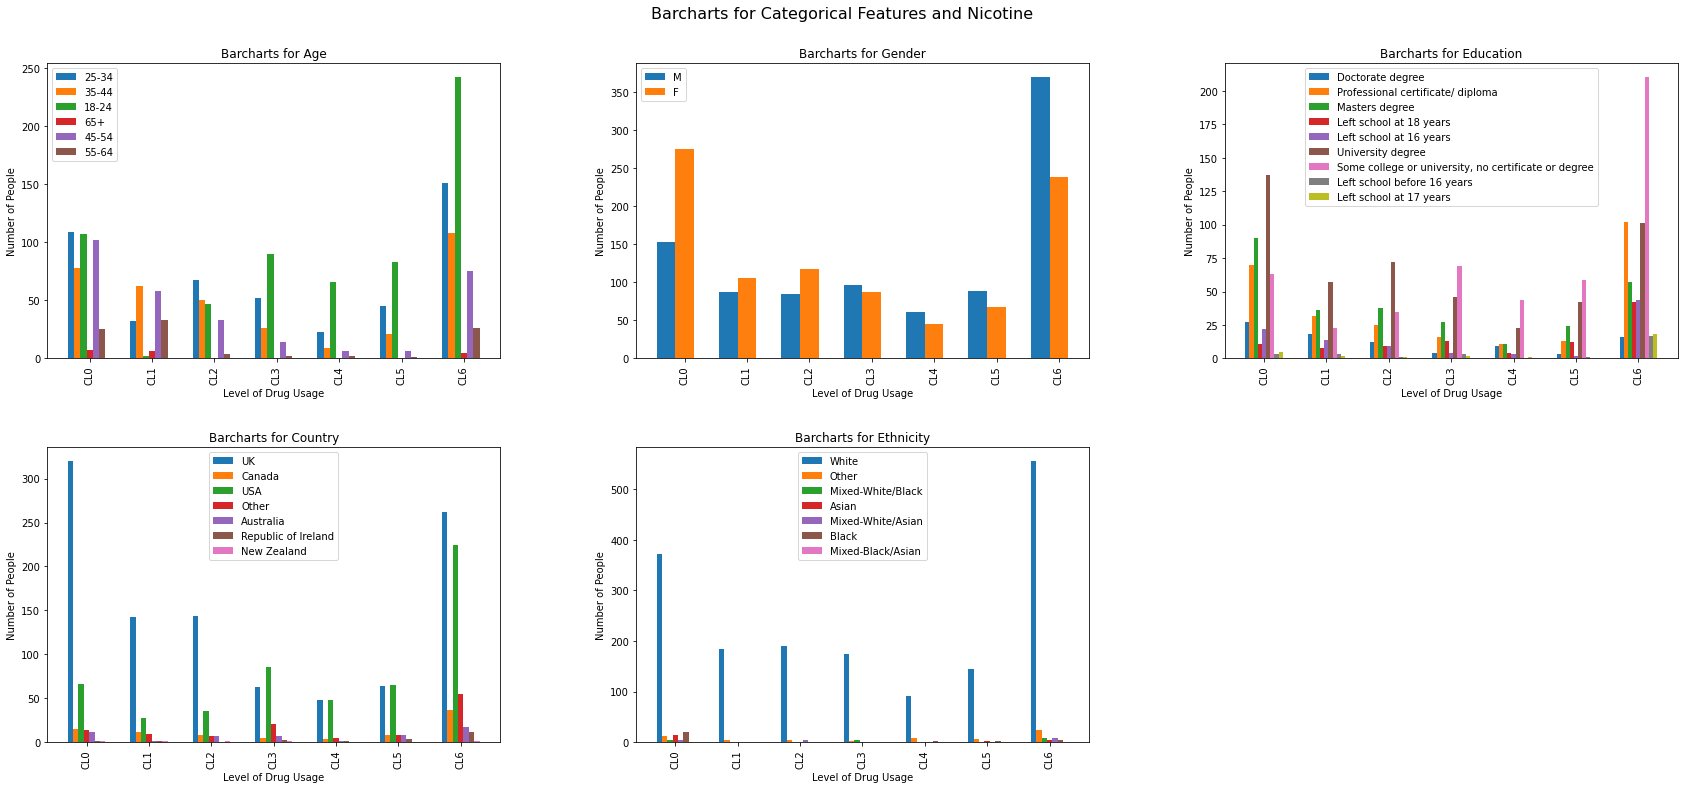

In [14]:
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)
for drug in drugs_to_consider:
  columns = []
  all_categories = []
  for categorical_feature in categorical_features:
    column = []
    categories = []
    for category in df[categorical_feature].unique():
      cl0 = len(df.loc[(df[drug]=='CL0') & (df[categorical_feature]==category)])
      cl1 = len(df.loc[(df[drug]=='CL1') & (df[categorical_feature]==category)])
      cl2 = len(df.loc[(df[drug]=='CL2') & (df[categorical_feature]==category)])
      cl3 = len(df.loc[(df[drug]=='CL3') & (df[categorical_feature]==category)])
      cl4 = len(df.loc[(df[drug]=='CL4') & (df[categorical_feature]==category)])
      cl5 = len(df.loc[(df[drug]=='CL5') & (df[categorical_feature]==category)])
      cl6 = len(df.loc[(df[drug]=='CL6') & (df[categorical_feature]==category)])
      catcolumn = [cl0, cl1, cl2, cl3, cl4, cl5, cl6]
      column.append(catcolumn)
      categories.append(category)
    columns.append(column)
    all_categories.append(categories)
  fig, ax = plt.subplots(2,3)
  for i in range(len(columns)):
    X_axis = np.linspace(0,6*len(columns[i])/3,7)
    for j in range(len(columns[i])):
      ax[i//3,i%3].bar(X_axis+(j-len(columns[i])//2)*0.2, columns[i][j], 0.2, label=all_categories[i][j])
      ax[i//3,i%3].set_xticks(X_axis)
      ax[i//3,i%3].set_xticklabels(['CL0','CL1','CL2','CL3','CL4','CL5','CL6'], rotation=90)
      ax[i//3,i%3].set_xlabel('Level of Drug Usage')
      ax[i//3,i%3].set_ylabel("Number of People")
      ax[i//3,i%3].set_title('Barcharts for ' + categorical_features[i])
      ax[i//3,i%3].legend()
  fig.delaxes(ax[1,2])
  fig.set_size_inches(23.5, 10.5)
  fig.suptitle("Barcharts for Categorical Features and " + drug, fontsize=16, y=1.04)
  plt.tight_layout()
  plt.subplots_adjust(hspace=0.3, wspace=0.3)
  plt.show()    